In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer

#Convolution layer of a kernel size 200
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer

#Convolution layer of a kernel size 100
model.add(Conv2D(100,(3,3)))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())

#Performing Dropout to avoid overfitting
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



Using Theano backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)             0         
__________

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 993 samples, validate on 249 samples
Epoch 1/20
993/993 [==============================] - 141s 142ms/step - loss: 0.8753 - acc: 0.5650 - val_loss: 0.6345 - val_acc: 0.5703
Epoch 2/20
993/993 [==============================] - 139s 140ms/step - loss: 0.5685 - acc: 0.6979 - val_loss: 0.5726 - val_acc: 0.6466
Epoch 3/20
993/993 [==============================] - 142s 143ms/step - loss: 0.4929 - acc: 0.7613 - val_loss: 0.4641 - val_acc: 0.7831
Epoch 4/20
993/993 [==============================] - 145s 146ms/step - loss: 0.3462 - acc: 0.8620 - val_loss: 0.4114 - val_acc: 0.8474
Epoch 5/20
993/993 [==============================] - 145s 146ms/step - loss: 0.3632 - acc: 0.8499 - val_loss: 0.2695 - val_acc: 0.8996
Epoch 6/20
993/993 [==============================] - 144s 145ms/step - loss: 0.2420 - acc: 0.9094 - val_loss: 0.2462 - val_acc: 0.9036
Epoch 7/20
993/993 [==============================] - 147s 148ms/step - loss: 0.1951 - acc: 0.9265 - val_loss: 0.2968 - val_acc: 0.9036
Ep

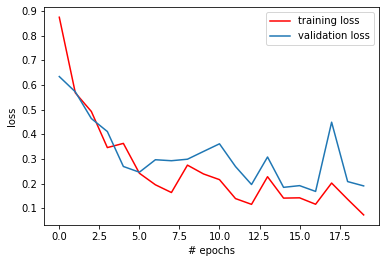

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [7]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 7s 51ms/step
[0.1781721695906658, 0.9420289855072463]


138/138 [==============================] - 6s 42ms/step
[0.10287276471870532, 0.9637681142143582]
